In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('data_exploration.csv')
df.head()

,DAILY,UNITS,day_num,NYSE,month_num
0,2019-06-15,2.0,5,0,6
1,2019-06-16,3.0,6,0,6
2,2019-06-17,43.0,0,0,6
3,2019-06-18,42.0,1,0,6
4,2019-06-19,42.0,2,0,6


In [3]:
df = df[['DAILY','UNITS']]
df['DAILY'] = pd.to_datetime(df['DAILY'])
#df.set_index('DAILY', inplace=True)
df.head()
df = df[(df["DAILY"] > "2020-05-31")]
#df = df[(df["DAILY"] < "2020-03-01") | (df["DAILY"] > "2020-05-31")]


In [4]:
df = df.resample('ME', on="DAILY").sum()
df = df.reset_index()
df = df[df["UNITS"] > 0]
df.tail(4)

,DAILY,UNITS
48,2024-06-30,1197.0
49,2024-07-31,1166.0
50,2024-08-31,1202.0
51,2024-09-30,284.0


In [5]:
df.iloc[:-4]


,DAILY,UNITS
0,2020-06-30,1173.0
1,2020-07-31,1034.0
2,2020-08-31,995.0
3,2020-09-30,1053.0
4,2020-10-31,1179.0
5,2020-11-30,1045.0
6,2020-12-31,1034.0
7,2021-01-31,994.0
8,2021-02-28,963.0
9,2021-03-31,1329.0


In [6]:
df = df.iloc[:-4]

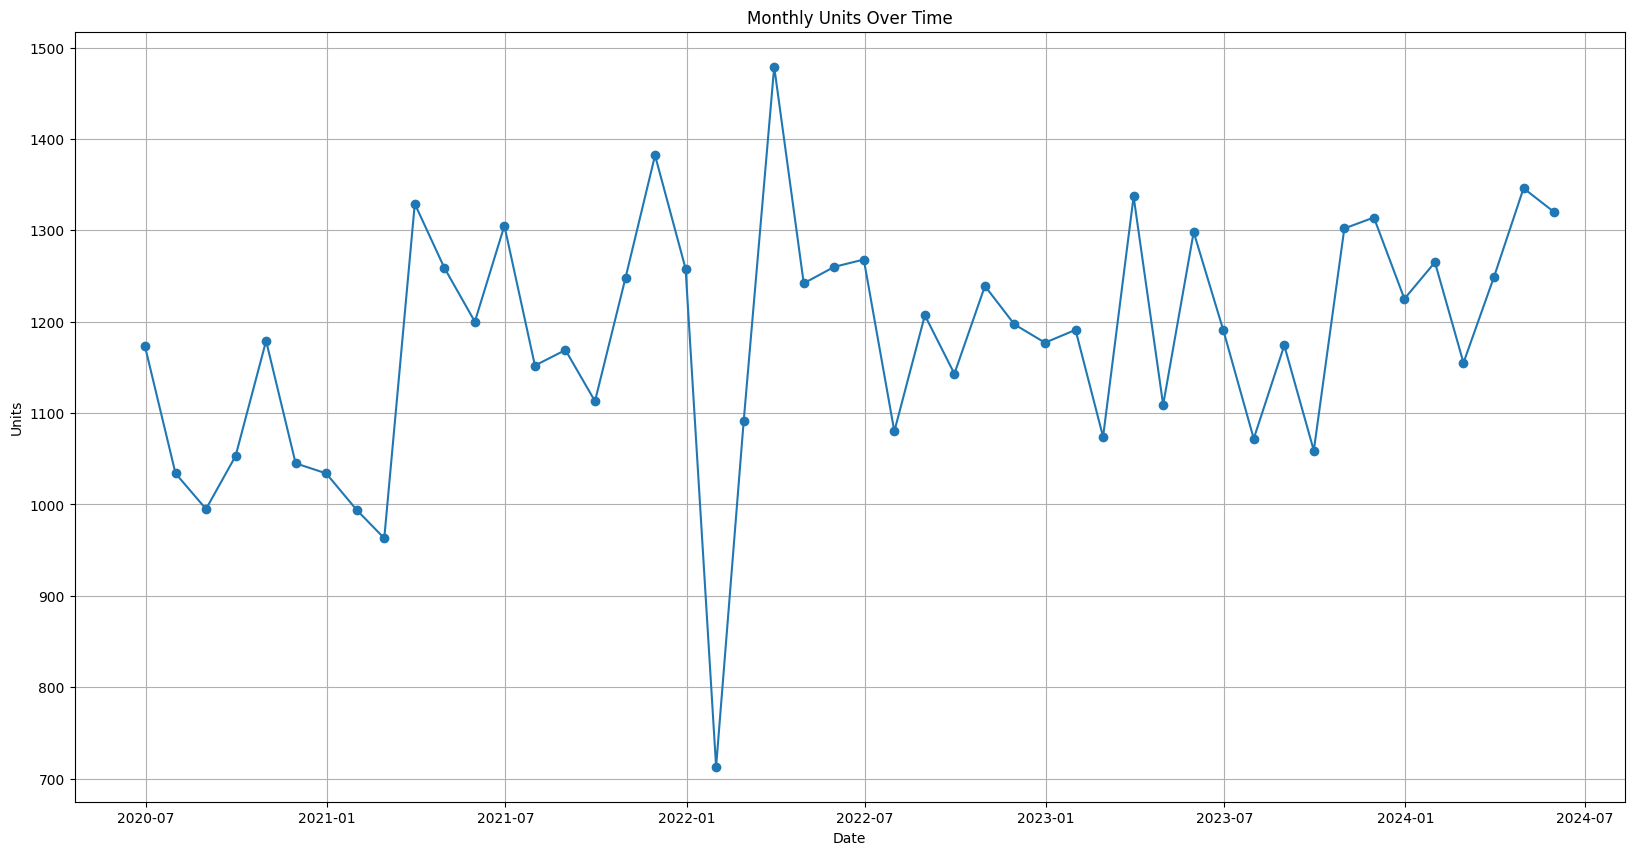

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(df["DAILY"], df['UNITS'], marker='o', linestyle='-')
plt.title('Monthly Units Over Time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.grid(True)
plt.show()
#I changed the graph. The old graph was still showing daily! OH THX !!

In [8]:
df.describe()

,DAILY,UNITS
count,48,48.000000
mean,2022-06-15 14:00:00,1180.458333
min,2020-06-30 00:00:00,713.000000
25%,2021-06-22 12:00:00,1088.250000
50%,2022-06-15 00:00:00,1191.000000
75%,2023-06-07 12:00:00,1261.250000
max,2024-05-31 00:00:00,1479.000000
std,NaN,132.058169


In [9]:
df.rename(columns={"DAILY": "ds", "UNITS": "y"}, inplace=True)
df["Month"] = df["ds"].dt.month

In [10]:
base = df.copy()
base['predicted'] = base['y'].mean()

In [11]:
mae = mean_absolute_error(base['y'], base['predicted'])
mse = mean_squared_error(base['y'], base['predicted'])
print(f'Baseline Model MAE: {mae:.2f}, MSE: {mse:.2f}')

Baseline Model MAE: 99.98, MSE: 17076.04


In [12]:
df

,ds,y,Month
0,2020-06-30,1173.0,6
1,2020-07-31,1034.0,7
2,2020-08-31,995.0,8
3,2020-09-30,1053.0,9
4,2020-10-31,1179.0,10
5,2020-11-30,1045.0,11
6,2020-12-31,1034.0,12
7,2021-01-31,994.0,1
8,2021-02-28,963.0,2
9,2021-03-31,1329.0,3


In [13]:
train_num = int(len(df) *.80)

train = df.iloc[:train_num]
test = df.iloc[train_num:]
test.head(2)

,ds,y,Month
38,2023-08-31,1174.0,8
39,2023-09-30,1059.0,9


In [14]:

model = Prophet(
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.01,
        seasonality_prior_scale=0.01,
    )

#model.add_country_holidays(country_name="US")
#model.add_seasonality(name='daily', period=1, fourier_order=1)
#model.add_seasonality(name='weekly', period=7, fourier_order=1)
#model.add_regressor("Month")
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)



# Fitting the model on the TRAINED data.
model.fit(train)
forecast_test = model.predict(test)
y_true = test['y'].values   # rep actual values
y_pred = forecast_test['yhat'].values   # rep pred values

# Calculating the final error metrics.
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print(f'Final Model MAE: {mae:.2f}, MSE: {mse:.2f}')


21:00:30 - cmdstanpy - INFO - Chain [1] start processing
21:00:31 - cmdstanpy - INFO - Chain [1] done processing


Final Model MAE: 65.59, MSE: 5826.82


In [15]:
from statsmodels.tsa.arima.model import ARIMA
residuals = y_true - y_pred

# Fit the ARIMA model on the residuals
arima_model = ARIMA(residuals, order=(4, 0, 3)) # p, d, q
arima_fit = arima_model.fit()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


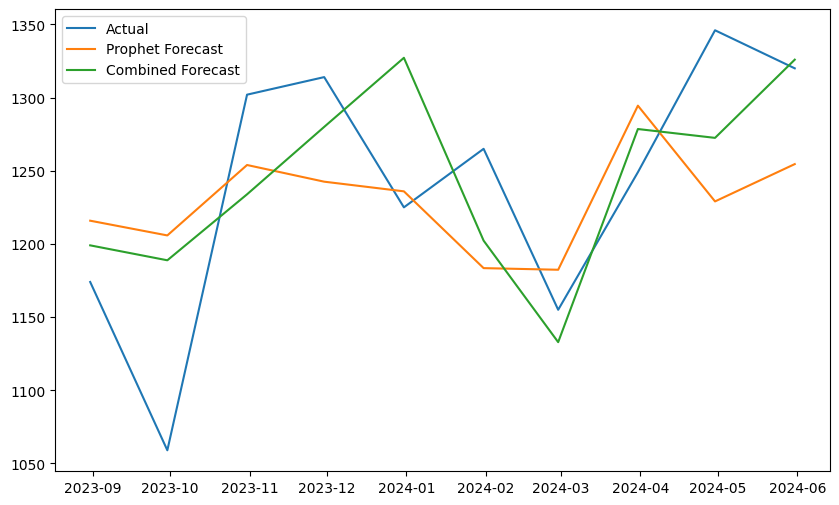

In [16]:
# Forecast the residuals
residual_forecast = arima_fit.forecast(steps=len(test))

# Combine the forecasts
final_forecast = forecast_test['yhat'] + residual_forecast

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], forecast_test['yhat'], label='Prophet Forecast')
plt.plot(test['ds'], final_forecast, label='Combined Forecast')
plt.legend()
plt.show()

In [17]:
# Calculating the final error metrics.
mae = mean_absolute_error(test['y'], final_forecast)
mse = mean_squared_error(test['y'], final_forecast)
print(f'Final Model MAE: {mae:.2f}, MSE: {mse:.2f}')

Final Model MAE: 55.30, MSE: 4445.50


In [18]:
df.describe()
(65/1180)*100

5.508474576271186

In [19]:

model = Prophet(
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=0.01,
    )

#model.add_country_holidays(country_name="US")
#model.add_seasonality(name='daily', period=1, fourier_order=1)
#model.add_seasonality(name='weekly', period=7, fourier_order=1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)



# Fitting the model on the TRAINED data.
model.fit(df)


21:00:32 - cmdstanpy - INFO - Chain [1] start processing
21:00:33 - cmdstanpy - INFO - Chain [1] done processing


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


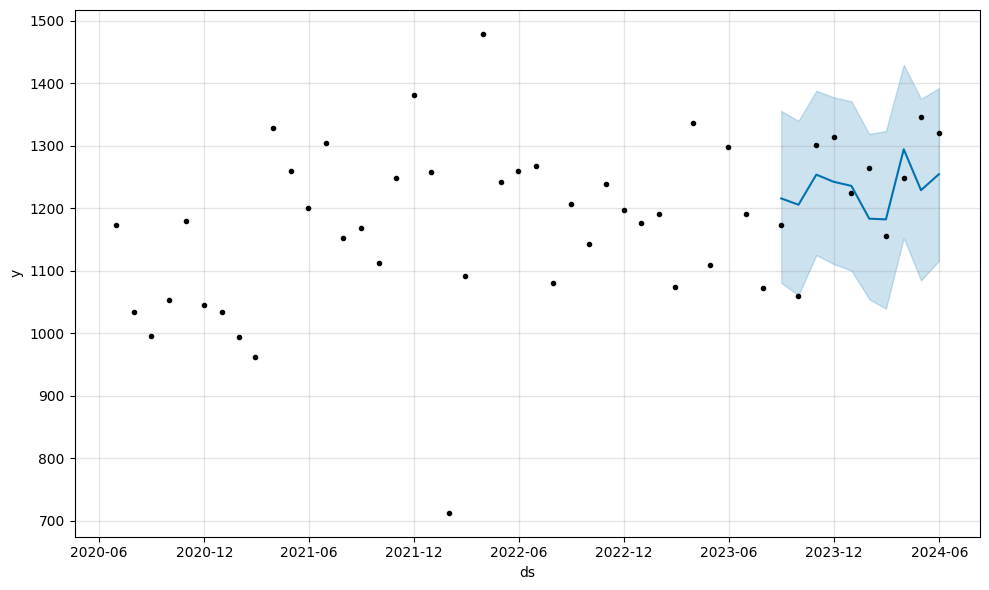

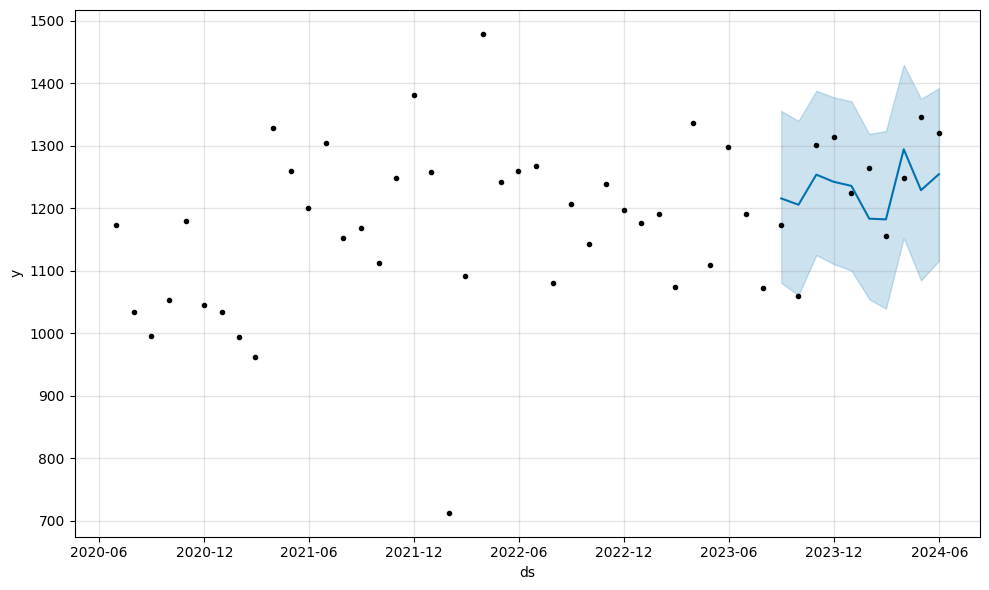

In [20]:
model.plot(forecast_test, uncertainty=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

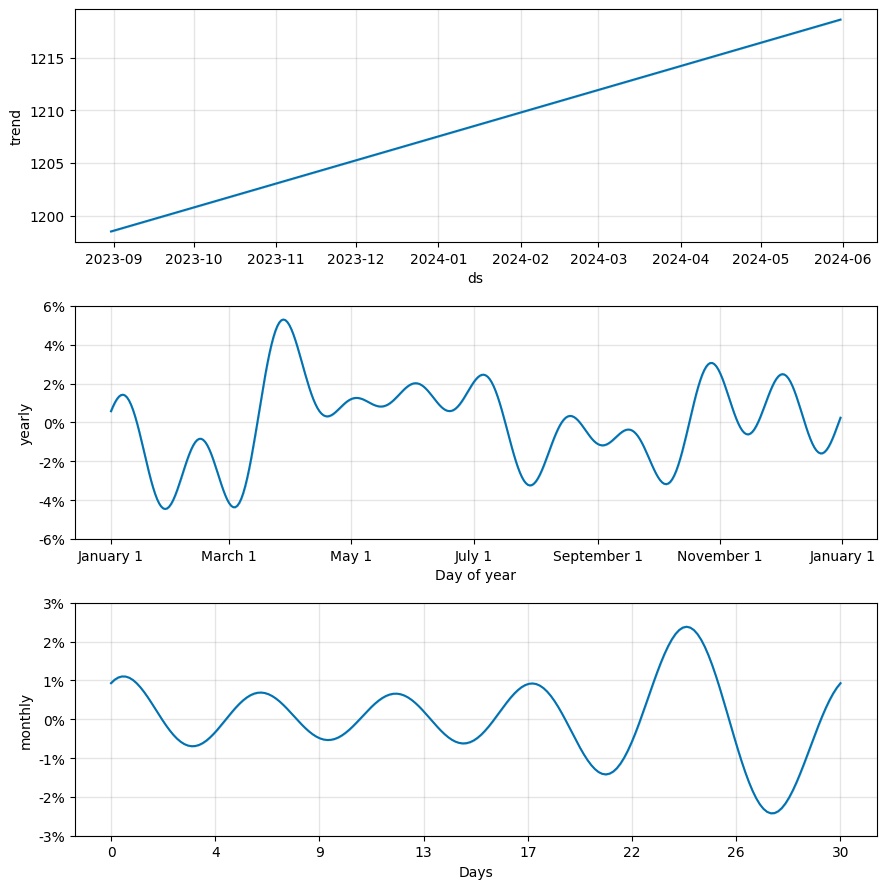

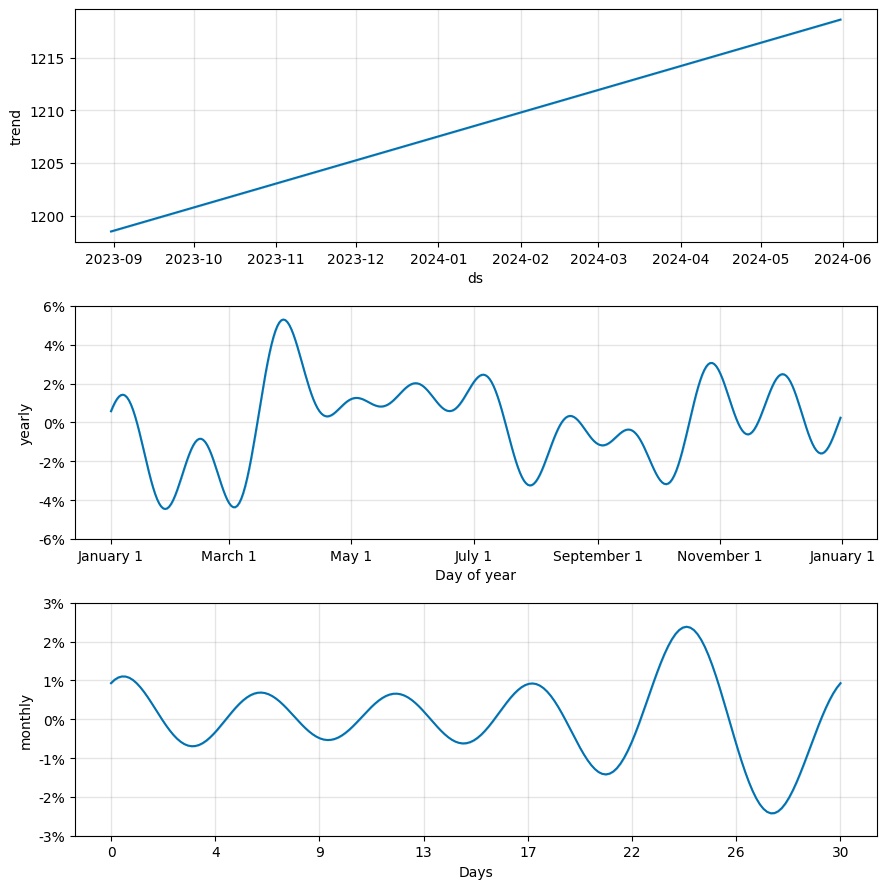

In [21]:
model.plot_components(forecast_test)

In [22]:
future = model.make_future_dataframe(periods=6, freq="M")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [23]:
'''48	2024-06-30	1197.0
49	2024-07-31	1166.0
50	2024-08-31	1202.0'''

# Forecast the residuals
residual_forecast = arima_fit.forecast(steps=len(future))
pred = model.predict(future)
# Combine the forecasts
final_forecast = pred['yhat'] + residual_forecast

pred["Hybrid"] = final_forecast

pred[["ds", "yhat", 'Hybrid']].tail(6)


,ds,yhat,Hybrid
48,2024-06-30,1263.428509,1231.525340
49,2024-07-31,1213.769408,1245.110379
50,2024-08-31,1249.779398,1325.087538
51,2024-09-30,1224.434489,1266.751312
52,2024-10-31,1301.693365,1277.532254
53,2024-11-30,1292.924883,1256.127951
